In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df=pd.read_csv('heart.csv')
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [3]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
col=df.columns[:-1]
print(col)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


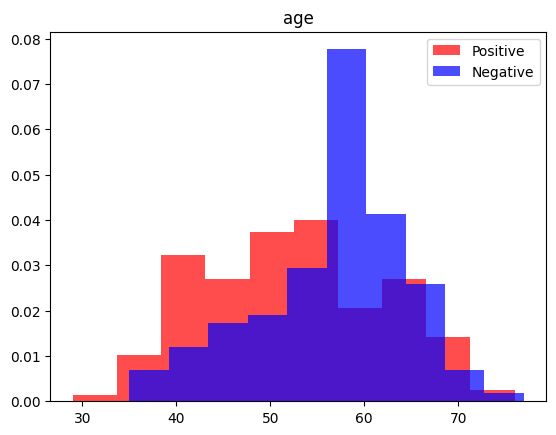

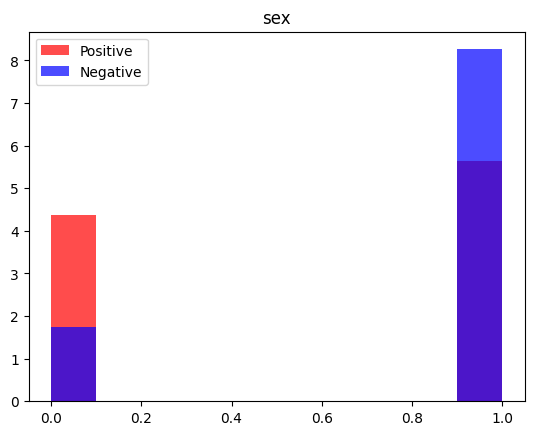

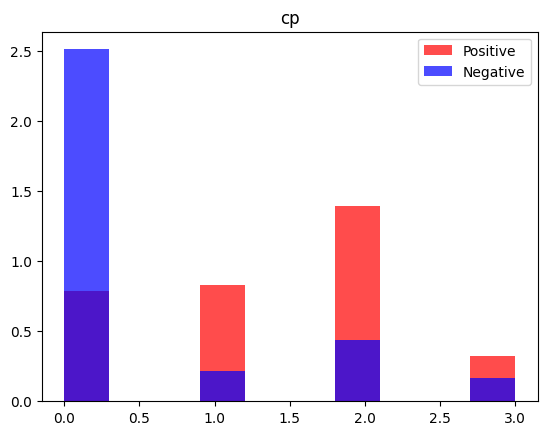

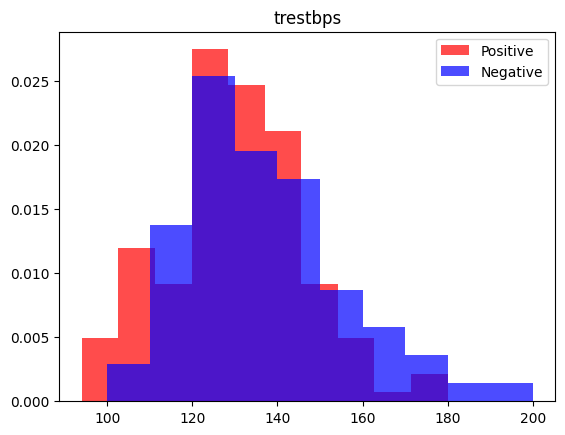

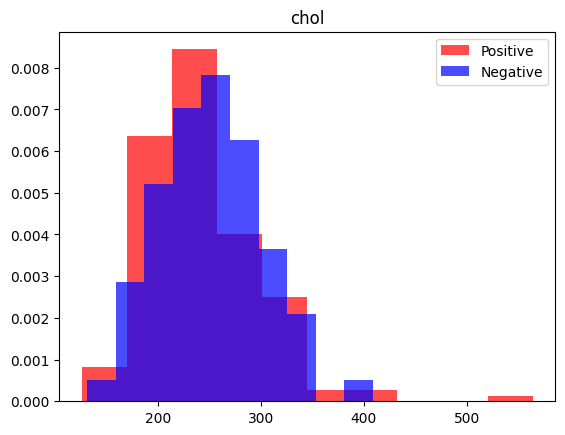

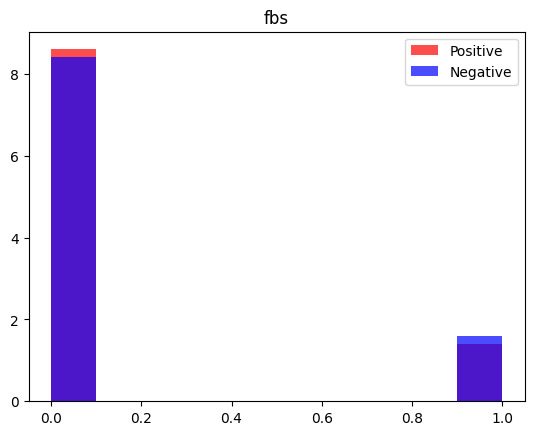

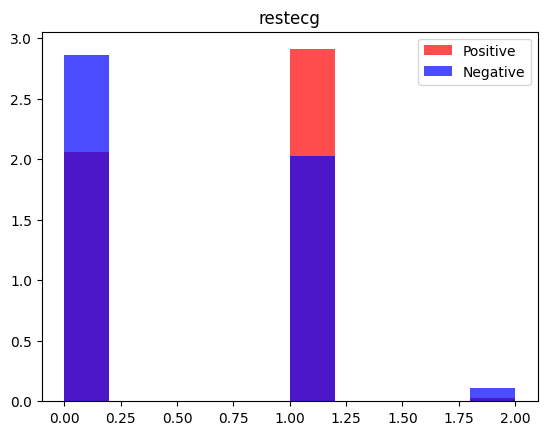

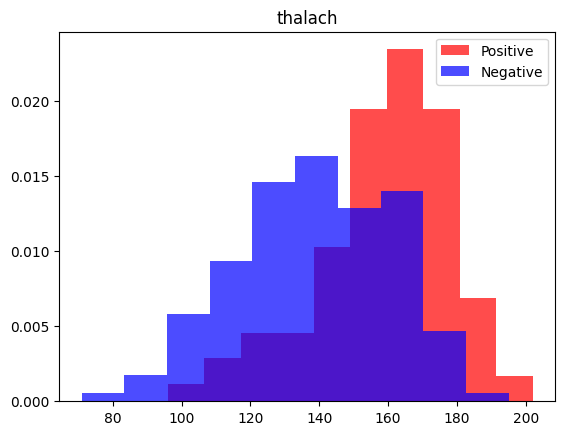

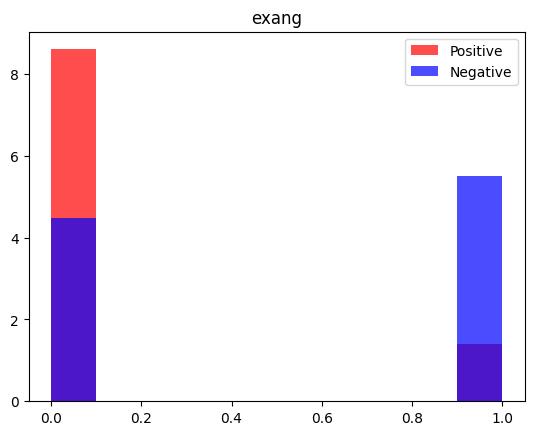

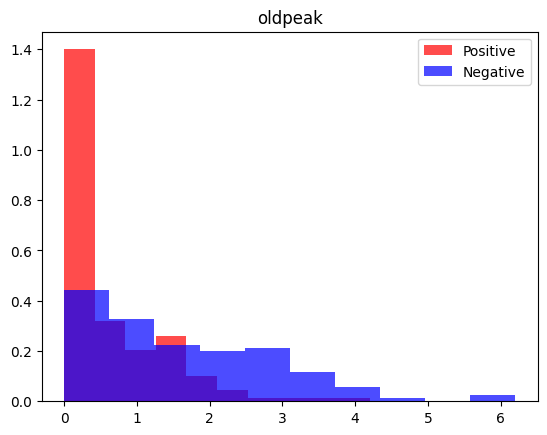

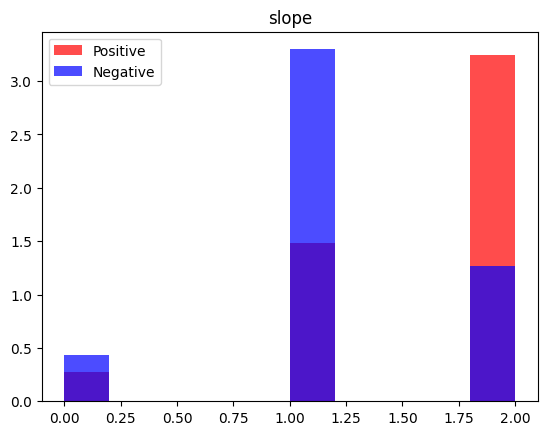

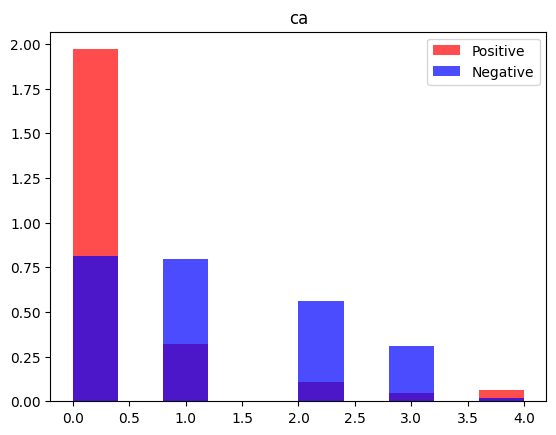

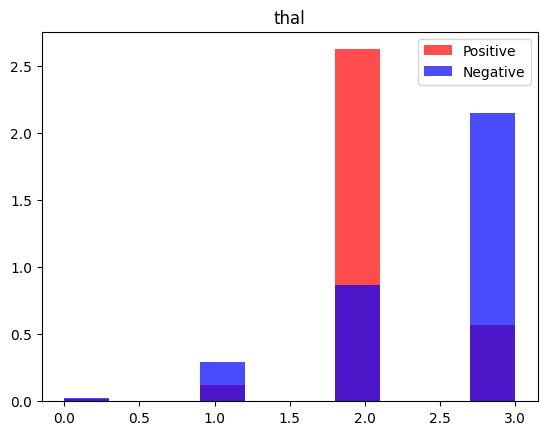

In [6]:
for label in col:
    plt.hist(df[df['target']==1][label],color='red',label='Positive',alpha=0.7,density=True)
    plt.hist(df[df['target']==0][label],color='blue',label='Negative',alpha=0.7,density=True)
    plt.title(label)
    plt.legend()
    plt.show()

In [7]:
X=df[df.columns[:-1]].values
y=df[df.columns[-1]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [9]:
#KNN model
knn_model=KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [10]:
y_pred=knn_model.predict(X_test)

In [11]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.63      0.76      0.69        29\n           1       0.73      0.59      0.66        32\n\n    accuracy                           0.67        61\n   macro avg       0.68      0.68      0.67        61\nweighted avg       0.68      0.67      0.67        61\n'

Accuracy for KNN:0.6721311475409836


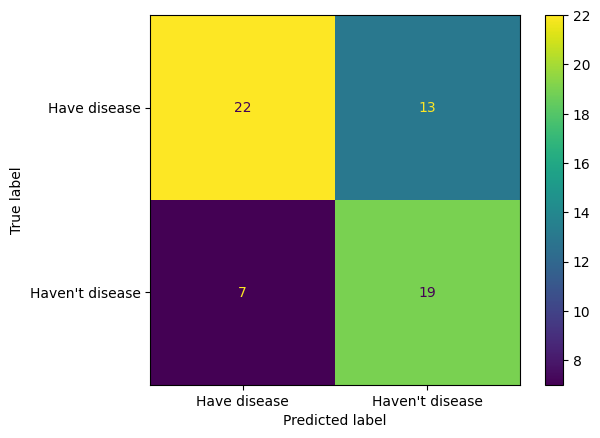

In [12]:
print("Accuracy for KNN:",end='')
print(accuracy_score(y_test, y_pred))
knn_confusion_matrix = metrics.confusion_matrix(y_pred, y_test)
knn_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn_confusion_matrix, display_labels = ["Have disease","Haven't disease"])
knn_cm_display.plot()
plt.show()

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

0.8688524590163934


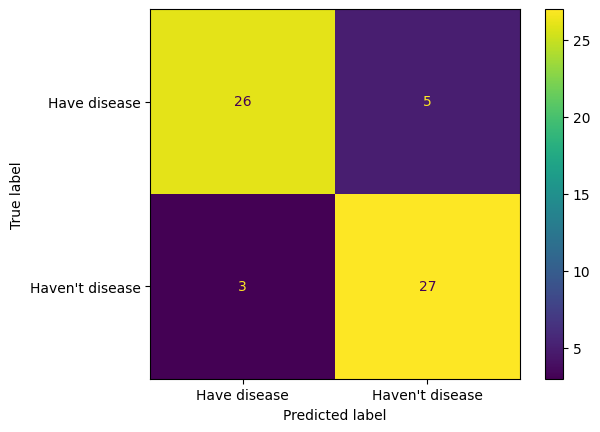

In [14]:
nb_model=GaussianNB()
NB_model=nb_model.fit(X_train,y_train)
NB_y_pred=NB_model.predict(X_test)
print(accuracy_score(NB_y_pred,y_test))
confusion_matrix = metrics.confusion_matrix(NB_y_pred, y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Have disease","Haven't disease"])
cm_display.plot()
plt.show()

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
DTC_model=DecisionTreeClassifier()
DTC_model=DTC_model.fit(X_train,y_train)

In [17]:
DTC_y_pred=DTC_model.predict(X_test)

In [18]:
print(accuracy_score(DTC_y_pred,y_test))

0.7868852459016393


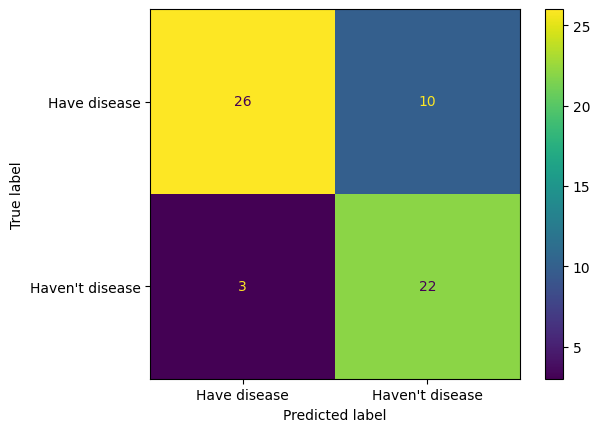

In [19]:
confusion_matrix = metrics.confusion_matrix(DTC_y_pred, y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Have disease","Haven't disease"])
cm_display.plot()
plt.show()